In [20]:
import matplotlib.pyplot as plt
import numpy as np
import texpy as mz
from src import *
files=[f'data/H038_D00{2-i}_Temp_RNL-rho.dat' for i in range(3)]


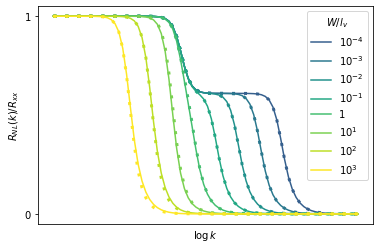

In [30]:
#@title $R_{NL}(k)$ for different widths {vertical-output:true}
#@markdown here you can change the parameters, `l_v`=$l_v$ and `tan`=$\tan(\theta_{VH})$, every time you change the values you have to re-execute the cell
number_of_graphs=8
cmap=plt.get_cmap('viridis')
colors=cmap(np.linspace(.3,1,number_of_graphs))

widths=np.logspace(-8,-1,number_of_graphs,base=10)
#mu=np.linspace(delta,2*delta,number_of_graphs)

lv = 1e-4 #@param {type:"number"}
tan=0.8 #@param {type:"number"}

theta=np.arctan(tan)
k= np.logspace(-2,12,80,base=10,dtype=np.double)

for i in range(number_of_graphs):
    R=[R_NLk(k,widths[i],lv,tan=tan) for k in k]
    label='$10^{'+str(int(np.log10(widths[i]/lv)))+'}$'
    if widths[i]==lv:label=1
    #plt.plot(np.array([1,1])/widths[i], [0,1],color=colors[i],linestyle=(0,(1,3)),linewidth=2)
    #plt.plot(k,R,color=colors[i],label=label,linewidth=3)
    plt.plot(k,R,color=colors[i],label=label,linewidth=1.5)
    plt.plot(k,R_NLk0(k,widths[i],lv,tan=tan),linestyle=(0,(1,3)),linewidth=3,color=colors[i])



title_theta='$\\theta_{VH}$='+str(theta/np.pi)[:4]+'$\pi$'
title_lv='$l_v=$'+ str(mz.ns(lv*1e9))+'nm'

title=title_theta + ', ' + title_lv

#@markdown the continous line is the exact formula `R_NLk`, wike the dots are from the approximate `R_NLk0`
#plt.plot(np.array([1,1])/lv, [0,1],color='black',linestyle=(2,(5,5)),linewidth=2)


plt.xscale('log')
plt.xlabel('$\log k$')
plt.xticks([])
plt.yticks([0,1])
plt.ylabel('$R_{NL}(k)/R_{xx}$')
#plt.title(title)
plt.legend(title='$W/l_v$')
#plt.savefig('Latex/Immagini/rnl/widths.pdf',format='pdf')
plt.savefig('Latex/Immagini/rnl/kapproxcomp.pdf',format='pdf')
plt.show()
#plt.xlim(0,500)

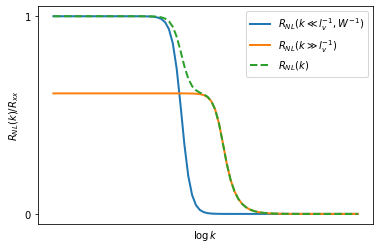

In [31]:
width=lv/20

# plt.plot(np.array([1,1])/width, [0,1],color=colors[1],linestyle=(0,(1,3)),linewidth=2)
# plt.plot(np.array([1,1])/lv, [0,1],color='black',linestyle=(2,(5,5)),linewidth=2)



k= np.logspace(-2,12,80,base=10,dtype=np.double)

c1= 1/(1+(Lv(width,lv,tan)*k)**2)
c2= 2*np.tanh(k*width/2)/(k*width*(1+tan**2))
plt.plot(k,c1,label='$R_{NL}(k\ll l_v^{-1},W^{-1})$',linewidth=2)
plt.plot(k,c2,label='$R_{NL}(k\gg l_v^{-1})$',linewidth=2)

R=[R_NLk(k,width,lv,tan=tan) for k in k]
plt.plot(k,R,linestyle='--',label='$R_{NL}(k)$',linewidth=2)



plt.xscale('log')
plt.xlabel('$\log k$')
plt.xticks([])
plt.yticks([0,1])
#plt.yticks([0,1/(1+tan**2),1],[0,'$1/[1+tan^2(\\theta_{VH})]$',1])
plt.ylabel('$R_{NL}(k)/R_{xx}$')
plt.legend()
plt.savefig('Latex/Immagini/rnl/2approx.pdf',format='pdf')
#plt.title(title)
plt.show()


In [32]:
#@title Here you can play with the numerical solution {vertical-output:true}
limit=1e4/width

x=(np.arange(70)*600)*np.pi/limit
Y=R_NLx(x,width,lv,tan,limit=limit)*width

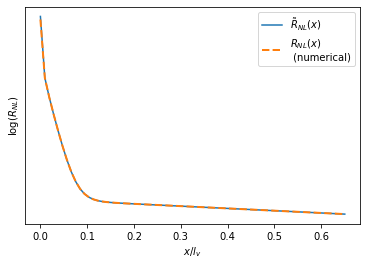

In [34]:

x[0]=1e-10
yappr=R_NL0(x,width,lv,tan) 
plt.plot(x/lv,np.log10(yappr),label='$\\tilde{R}_{NL}(x)$')

# yappr=R_NL1(x,width,lv,tan)
# plt.plot(x/lv,yappr,label='$R_{NL}(x\gg l_v,W)$')
# yappr=R_NL2(x[:10],width,lv,tan)
# plt.plot(x[:10]/lv,yappr,label='$R_{NL}(x\ll l_v)$')



plt.plot(x/lv,np.log10(Y),label='$R_{NL}(x)$\n (numerical)',linestyle='--',linewidth=2)


#plt.yscale('log')
plt.xlabel('$x/l_v$')
plt.ylabel('$\log (R_{NL})$')
plt.yticks([])

title_width='$W=$'+str(mz.ns(width*1e9))+'nm'
title=title_theta + ', ' + title_lv + ', ' + title_width

#plt.title(title)
#plt.legend(loc='right', bbox_to_anchor=(1.15,0.5), shadow=True,title='width [nm]')
#plt.xlim(0,1)
#plt.ylim(1e-3,1)
plt.legend()
#plt.savefig('Latex/Immagini/rnl/x2approx.pdf',format='pdf')
plt.savefig('Latex/Immagini/rnl/xapprox.pdf',format='pdf')


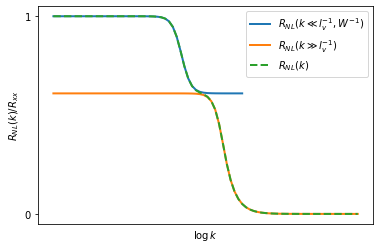

In [35]:

# plt.plot(np.array([1,1])/width, [0,1],color=colors[1],linestyle=(0,(1,3)),linewidth=2)
# plt.plot(np.array([1,1])/lv, [0,1],color='black',linestyle=(2,(5,5)),linewidth=2)



k= np.logspace(-2,12,80,base=10,dtype=np.double)

c1= 1/(1+(Lv(width,lv,tan)*k)**2)/(1+tan**(-2))+ 1/(1+tan**2)
c2= 2*np.tanh(k*width/2)/(k*width*(1+tan**2))
plt.plot(k[:50],c1[:50],label='$R_{NL}(k\ll l_v^{-1},W^{-1})$',linewidth=2)
plt.plot(k,c2,label='$R_{NL}(k\gg l_v^{-1})$',linewidth=2)

R=[R_NLk(k,width,lv,tan=tan) for k in k]
plt.plot(k,R,linestyle='--',label='$R_{NL}(k)$',linewidth=2)



plt.xscale('log')
plt.xlabel('$\log k$')
plt.xticks([])
plt.yticks([0,1])
plt.ylabel('$R_{NL}(k)/R_{xx}$')
plt.legend()
plt.savefig('Latex/Immagini/rnl/3approx.pdf',format='pdf')
#plt.title(title)
plt.show()

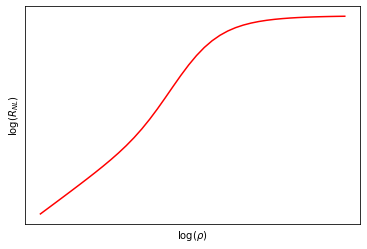

In [36]:
#@title Confronting with the theory {vertical-output:true}

width = 1.7e-6              #@param {type:"number"}
lv = 1.6e-6                 #@param {type:"number"}
x=2.3e-6                    #@param {type:"number"}
#@markdown ---
#@markdown `data_file`is a dropdown menu where you can choose the datapoints from the file
data_file = 2 #@param ["0", "1", "2"] {type:"raw"}
#@markdown `hall_cond` is an integer and with it you can change the theoretical prediction of $R_{NL}$ 
hall_cond = 4#@param {type:"integer"}

hall_conductivity=hall_cond*e**2/(2*np.pi*hbar)
rhoxx=np.logspace(np.log10(1e2),np.log10(5e5),40)
tan=rhoxx*hall_conductivity

colors=['blue','black','red']

plt.plot(np.log10(rhoxx),np.log10(R_NLx(x,width,lv,tan,limit=4e13)*rhoxx*width),label='$numerical$',color=colors[data_file])
#plt.plot(rhoxx,R_NL0(x,width,lv,tan)*rhoxx,label='$approx$',linestyle=(0,(1,3)),linewidth=3,color=colors[data_file])

#this part is for the data
files=[f'data/H038_D00{2-i}_Temp_RNL-rho.dat' for i in range(3)]
data=np.loadtxt(files[data_file])
resistance=data[:,1]
rho=data[:,2]
shapes=['^','o','s']
#plt.plot(rho,resistance,shapes[data_file],color=colors[data_file],label='datapoints')
    
#plt.xscale('log')
#plt.yscale('log')
plt.xticks([])
plt.yticks([])
#plt.legend()
#plt.title(f'Hall conductivity = {hall_cond}$\, e^2/h$')
plt.xlabel('$\log (\\rho)$')
plt.ylabel('$\log (R_{NL})$')
plt.savefig('Latex/Immagini/rnl/rho0.pdf',format='pdf')

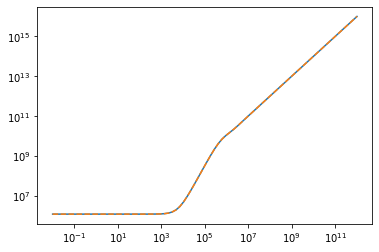

In [37]:
tan=1e2
def f(k,width):
    return k/np.tanh(k*width/2)
def g(k,width,lv,tan):
    omega=np.sqrt(k**2+lv**(-2))
    return k**2*tan**2/(omega*np.tanh(omega*width/2))
f=f(k,width)  
g=g(k,width,lv,tan)  
# plt.plot(k,f,label='$f(k,W)$')
# plt.plot(k,g)
plt.plot(k,f+g)
plt.plot(k,g+2/width,linestyle='--')
plt.xscale('log')
plt.yscale('log')

/var/folders/vg/h6knjndn79l9ytz887vfbrcm0000gn/T/ipykernel_35963/3676905904.py:7: RuntimeWarning: invalid value encountered in true_divide
  return k/np.tanh(k*width/2)


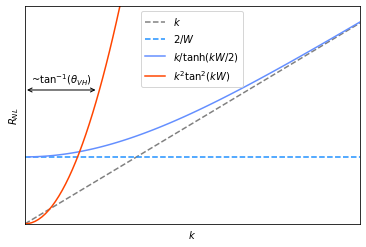

In [38]:
tan=1.5e-1
width=1e-2
lv=1e-5
k= np.logspace(-2,12,80,base=10,dtype=np.double)
k=np.linspace(0,600,100)
def f(k,width):
    return k/np.tanh(k*width/2)
def g(k,width,lv,tan):
    omega=np.sqrt(k**2+lv**(-2))
    return k**2*tan**2
    
color="orangered"
plt.plot([0,k[-1]],[0,k[-1]],color='grey',linestyle='--',label="$k$")
plt.plot([k[0],k[-1]],2*np.ones(2)/width,color='dodgerblue',linestyle='--',label="$2/W$")
plt.plot(k,f(k,width),color='#648FFF',label="$k/\\tanh(kW/2)$")

plt.plot(k,g(k,width,lv,tan),color="orangered",label="$k^2\\tan^2(kW)$")
plt.xlabel('$k$')
plt.ylabel('$R_{NL}$')
plt.ylim(0,650)
plt.xlim(0,k[-1])


plt.annotate('', xy=(130,400), xytext=(0,400), arrowprops=dict(arrowstyle='<->'))
plt.annotate('~$\\tan^{-1}(\\theta_{VH})}$',xy=(0,0),xytext=(10,420))

plt.legend()
plt.xticks([])
plt.yticks([])
plt.savefig('Latex/Immagini/rnl/rho1.pdf',format='pdf')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


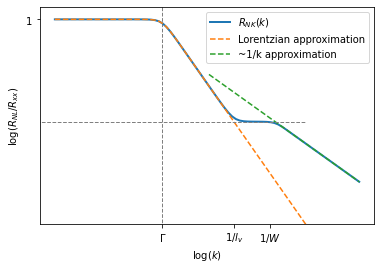

In [94]:

tan=1e4
width=1e-7
def f(k,width,lv,tan):
    omega=np.sqrt(k**2+lv**(-2))
    denom=1+ width*k**2*tan**2/(2*omega*np.tanh(omega*width/2))
    return 1/denom

def lor(k,width,lv,tan):
    return 1/(1 + lv*width*k**2*tan**2/(np.tanh(width/(2*lv)*2)))

def g(k,width,lv,tan):
    return 1/(1+ width*k*tan**2/2)

k= np.logspace(-5,12,80,base=10,dtype=np.double)


s=np.sqrt(2*np.tanh(width/(2*lv)))/(tan*np.sqrt(lv*width))

plt.plot(np.ones(2)*s,[10,0],linestyle='--',color='grey',linewidth=1)



plt.plot(k,f(k,width,lv,tan),label='$R_{NK}(k)$',linewidth=2)
plt.plot(k,lor(k,width,lv,tan), linestyle='--',label='Lorentzian approximation')
plt.plot(k[40:],g(k,width,lv,tan)[40:],linestyle='--',label='~1/k approximation')
plt.plot([0,100/width],np.ones(2)/(1+tan**2),linestyle='--',color='gray',linewidth=1)
plt.xscale('log')
plt.yscale('log')
plt.yticks([1],['$1$'])
plt.xticks([s,1/lv,1/width],['$\Gamma$','$1/l_v$','$1/W$'])
plt.ylim(1e-16,10)
plt.xlabel('$\log (k)$')
plt.ylabel('$\log (R_{NL}/R_{xx})$')
plt.legend()
plt.savefig('Latex/Immagini/rnl/rho3.eps',format='eps')

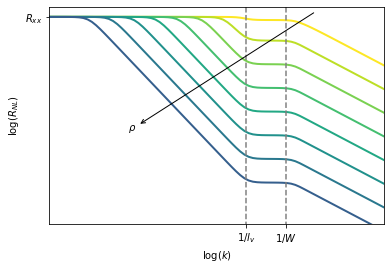

In [93]:
width=1e-7
lv=1e-5
tans=np.logspace(0,8,8,base=10,dtype=np.double)
colors=cmap(np.linspace(1,.3,number_of_graphs))
for tan,color in zip(tans,colors):
    plt.plot(np.log10(k),np.log10(f(k,width,lv,tan)),label='$R_{NK}(k)$',linewidth=2,color=color)

plt.plot(np.log10(np.ones(2)/lv),[1,-20],linestyle='--',color='grey')
plt.plot(np.log10(np.ones(2)/width),[1,-20],linestyle='--',color='grey')


#plt.xscale('log')
#plt.yscale('log')
plt.yticks([0],['$R_{xx}$'])
plt.xticks([-np.log10(lv),-np.log10(width)],['$1/l_v$','$1/W$'])
plt.ylim(-20,1)
plt.xlim(-5,12)
plt.xlabel('$\log (k)$')
plt.ylabel('$\log (R_{NL})$')
plt.annotate('$\\rho$', xytext=(-1,-11),xy=(8.5,.5),  arrowprops=dict(arrowstyle='<-'))



plt.savefig('Latex/Immagini/rnl/rho2.pdf',format='pdf')

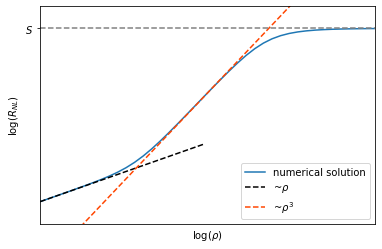

In [103]:


#@title Studying $R_{NL}$ by changing the resistivity of the material $\rho$ at different valley Hall conductivities $\sigma_{v}$ {vertical-output:true}
width = 6.0e-7              #@param {type:"number"}
lv = 1.6e-6                 #@param {type:"number"}
x=2.3e-6                    #@param {type:"number"}
hall_conductivities=[0,2] #@param
#@markdown In the graph below is shown $R_{NL0}(x)$ (see equations in the cells above) as we change $\rho$ of the material for different (but quantized Valley-Hall conductivities)

colors=cmap(np.linspace(.3,1,np.max([len(hall_conductivities),3])))
#files=[f'data/H038_D00{2-i}_Temp_RNL-rho.dat' for i in range(3)]

min,max=5,1e6
rhoxx=np.logspace(np.log10(min),np.log10(max),40)
#this part is for the graph of the function
hall_conductivity=2*e**2/(2*np.pi*hbar)
tan=rhoxx*hall_conductivity
inp=R_NLx(x,width,lv,tan,limit=4e13)*rhoxx*width

#rhoxx=np.log10(rhoxx)
plt.plot(np.log10(rhoxx),inp,label='numerical solution')
#plt.plot(rhoxx,R_NL1(x,width,lv,tan)*rhoxx,color=colors[i+1])
#plt.plot(rhoxx,R_NL2(x,width,lv,tan)*rhoxx,color=colors[i+2])
plt.plot(np.log10(rhoxx[:20]),R_NLx(x,width,lv,0,limit=4e13)*rhoxx[:20]*width,color='black',linestyle='--',label='~$\\rho$')
y=rhoxx**3*width*hall_conductivity**2*np.exp(-x/Lv(width,lv,0))/(2*Lv(width,lv,0))    
plt.plot(np.log10(rhoxx),y,linestyle='--',color='orangered',label='~$\\rho^3$')
S=np.sqrt(width/2/lv*np.tanh(width/(2*lv)))/hall_conductivity
plt.plot([np.log10(rhoxx[0]),np.log10(rhoxx[-1])],np.ones(2)*S,linestyle='--',color='grey')



#plt.xscale('log')
plt.yscale('log')
plt.ylim(inp[0]/10,inp[-1]*10)
plt.xlim(np.log10(min),np.log10(max))
plt.legend()
plt.xlabel('$\log (\\rho)$')
plt.ylabel('$\log (R_{NL})$')
plt.yticks([S],['$S$'])
plt.xticks([])
plt.savefig('Latex/Immagini/rnl/all_approx_rho.pdf',format='pdf')

#@markdown This graph aims to explain the experimental points in figure 2f of this paper https://arxiv.org/pdf/2205.01760.pdf



#plt.plot([1e3,1e4],[2e1,1e3])
#plt.plot([min,max],width/(2*lv*hall_conductivity)*np.array([1,1]),color='black',linestyle='--')

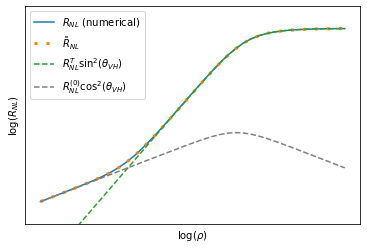

In [108]:


#@title Studying $R_{NL}$ by changing the resistivity of the material $\rho$ at different valley Hall conductivities $\sigma_{v}$ {vertical-output:true}
width = 6.0e-7              #@param {type:"number"}
lv = 1.6e-6                 #@param {type:"number"}
x=2.3e-6                    #@param {type:"number"}
hall_conductivities=[0,2] #@param
#@markdown In the graph below is shown $R_{NL0}(x)$ (see equations in the cells above) as we change $\rho$ of the material for different (but quantized Valley-Hall conductivities)

colors=cmap(np.linspace(.3,1,np.max([len(hall_conductivities),3])))
#files=[f'data/H038_D00{2-i}_Temp_RNL-rho.dat' for i in range(3)]

min,max=5,1e6
rhoxx=np.logspace(np.log10(min),np.log10(max),40)

#this part is for the graph of the function
hall_conductivity=2*e**2/(2*np.pi*hbar)
tan=rhoxx*hall_conductivity
inp=R_NLx(x,width,lv,tan,limit=4e13)*rhoxx*width
rhoxx=np.log10(rhoxx)
plt.plot(rhoxx,np.log10(inp),label='$R_{NL}$ (numerical)')
plt.plot(rhoxx,np.log10(R_NL0(x,width,lv,tan))+rhoxx,linestyle=(0,(1,3)),linewidth=3,label='$\\tilde{R}_{NL}$')
plt.plot(rhoxx,np.log10(R_NL1(x,width,lv,tan))+rhoxx,linestyle='--',label='$R_{NL}^T\sin^2(\\theta_{VH})$')
plt.plot(rhoxx,np.log10(R_NL2(x,width,lv,tan))+rhoxx,linestyle='--',color='gray',label='$R_{NL}^{(0)}\cos^2(\\theta_{VH})$')


#plt.xscale('log')
#plt.yscale('log')
plt.ylim(np.log10(inp[0])-1,np.log10(inp[-1])+1)
#plt.xlim(min,max)
plt.legend()
plt.xlabel('$\log (\\rho)$')
plt.ylabel('$\log (R_{NL})$')
plt.yticks([])
plt.xticks([])
plt.savefig('Latex/Immagini/rnl/two_approx_rho.pdf',format='pdf')

#@markdown This graph aims to explain the experimental points in figure 2f of this paper https://arxiv.org/pdf/2205.01760.pdf



#plt.plot([1e3,1e4],[2e1,1e3])
#plt.plot([min,max],width/(2*lv*hall_conductivity)*np.array([1,1]),color='black',linestyle='--')

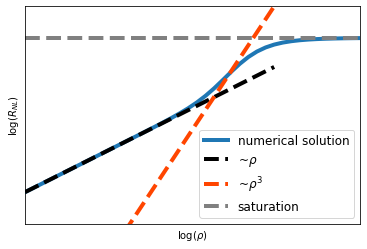

In [117]:


#@title Studying $R_{NL}$ by changing the resistivity of the material $\rho$ at different valley Hall conductivities $\sigma_{v}$ {vertical-output:true}
width = 1.7e-6              #@param {type:"number"}
lv = 1.6e-6                 #@param {type:"number"}
x=2.3e-6                    #@param {type:"number"}
hall_conductivities=[0,2] #@param
#@markdown In the graph below is shown $R_{NL0}(x)$ (see equations in the cells above) as we change $\rho$ of the material for different (but quantized Valley-Hall conductivities)

colors=cmap(np.linspace(.3,1,np.max([len(hall_conductivities),3])))
#files=[f'data/H038_D00{2-i}_Temp_RNL-rho.dat' for i in range(3)]

min,max=5,1e6
rhoxx=np.logspace(np.log10(min),np.log10(max),40)

#this part is for the graph of the function
hall_conductivity=2*e**2/(2*np.pi*hbar)
tan=rhoxx*hall_conductivity
inp=R_NLx(x,width,lv,tan,limit=4e13)*rhoxx*width
plt.plot(np.log10(rhoxx),np.log10(inp),linewidth=4,label='numerical solution')
#plt.plot(rhoxx,R_NL1(x,width,lv,tan)*rhoxx,color=colors[i+1])
#plt.plot(rhoxx,R_NL2(x,width,lv,tan)*rhoxx,color=colors[i+2])
plt.plot(np.log10(rhoxx[:30]),np.log10(R_NLx(x,width,lv,0,limit=4e13)*rhoxx[:30]*width),color='black',linestyle='--',linewidth=4,label='~$\\rho$')
y=rhoxx**3*width*hall_conductivity**2*np.exp(-x/Lv(width,lv,0))/(2*Lv(width,lv,0))    
plt.plot(np.log10(rhoxx),np.log10(y),linestyle='--',color='orangered',linewidth=4,label='~$\\rho^3$')
S=np.sqrt(width/2/lv*np.tanh(width/(2*lv)))/hall_conductivity
plt.plot([np.log10(rhoxx[0]),np.log10(rhoxx[-1])],np.log10(np.ones(2)*S),linestyle='--',color='grey',linewidth=4,label='saturation')

#plt.xscale('log')
#plt.yscale('log')
plt.ylim(np.log10(inp[0])-1,np.log10(inp[-1])+1)
plt.xlim(np.log10(min),np.log10(max))
plt.legend(prop={'size': 12})
plt.xlabel('$\log (\\rho)$')
plt.ylabel('$\log (R_{NL})$')
plt.yticks([S],['$S$'])
plt.xticks([])
plt.savefig('Latex/Immagini/rnl/mixed_all_approx_rho.pdf',format='pdf')

#@markdown This graph aims to explain the experimental points in figure 2f of this paper https://arxiv.org/pdf/2205.01760.pdf



#plt.plot([1e3,1e4],[2e1,1e3])
#plt.plot([min,max],width/(2*lv*hall_conductivity)*np.array([1,1]),color='black',linestyle='--')

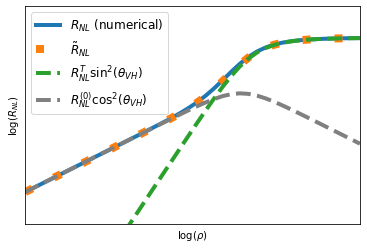

In [118]:

#@title Studying $R_{NL}$ by changing the resistivity of the material $\rho$ at different valley Hall conductivities $\sigma_{v}$ {vertical-output:true}
width = 1.7e-6              #@param {type:"number"}
lv = 1.6e-6                 #@param {type:"number"}
x=2.3e-6                    #@param {type:"number"}
hall_conductivities=[2] #@param
#@markdown In the graph below is shown $R_{NL0}(x)$ (see equations in the cells above) as we change $\rho$ of the material for different (but quantized Valley-Hall conductivities)

colors=cmap(np.linspace(.3,1,np.max([len(hall_conductivities),3])))
#files=[f'data/H038_D00{2-i}_Temp_RNL-rho.dat' for i in range(3)]

min,max=5,1e6
rhoxx=np.logspace(np.log10(min),np.log10(max),40)

#this part is for the graph of the function
hall_conductivity=2*e**2/(2*np.pi*hbar)
tan=rhoxx*hall_conductivity
inp=R_NLx(x,width,lv,tan,limit=4e13)*rhoxx*width

rhoxx=np.log10(rhoxx)
plt.plot(rhoxx,np.log10(inp),linewidth=4,label='$R_{NL}$ (numerical)')
plt.plot(rhoxx,np.log10(R_NL0(x,width,lv,tan))+rhoxx,linestyle=(0,(1,3)),linewidth=8,label='$\\tilde{R}_{NL}$')
plt.plot(rhoxx,np.log10(R_NL1(x,width,lv,tan))+rhoxx,linestyle='--',linewidth=4,label='$R_{NL}^T\sin^2(\\theta_{VH})$')
plt.plot(rhoxx,np.log10(R_NL2(x,width,lv,tan))+rhoxx,linestyle='--',linewidth=4,color='gray',label='$R_{NL}^{(0)}\cos^2(\\theta_{VH})$')


#plt.xscale('log')
#plt.yscale('log')
plt.ylim(np.log10(inp[0])-1,np.log10(inp[-1])+1)
plt.xlim(np.log10(min),np.log10(max))
plt.legend(prop={'size': 12})
plt.xlabel('$\log (\\rho)$')
plt.ylabel('$\log (R_{NL})$')
plt.yticks([])
plt.xticks([])
plt.savefig('Latex/Immagini/rnl/mixed_approx_rho.pdf',format='pdf')

#@markdown This graph aims to explain the experimental points in figure 2f of this paper https://arxiv.org/pdf/2205.01760.pdf



#plt.plot([1e3,1e4],[2e1,1e3])
#plt.plot([min,max],width/(2*lv*hall_conductivity)*np.array([1,1]),color='black',linestyle='--')

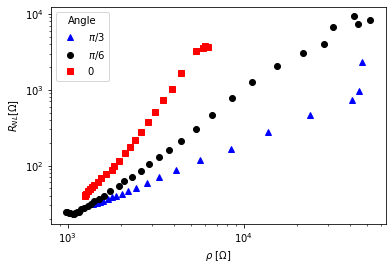

In [18]:
#@title Confronting with the theory {vertical-output:true}

width = 1.7e-6              #@param {type:"number"}
lv = 1.6e-6                 #@param {type:"number"}
x=2.3e-6                    #@param {type:"number"}
#@markdown ---
#@markdown `data_file`is a dropdown menu where you can choose the datapoints from the file
angles=['$\pi/3$','$\pi/6$',0]
for data_file in range(3):
    #@markdown `hall_cond` is an integer and with it you can change the theoretical prediction of $R_{NL}$ 



    colors=['blue','black','red']

    #this part is for the data
    data=np.loadtxt(files[data_file])
    resistance=data[:,1]
    rho=data[:,2]
    shapes=['^','o','s']
    hall_cond=[0,2,4]
    plt.plot(rho,resistance,shapes[data_file],color=colors[data_file],label=angles[data_file])
    
plt.xscale('log')
plt.yscale('log')
plt.legend(title='Angle')
plt.xlabel('$\\rho$ [$\Omega$]')
plt.ylabel('$R_{NL}$[$\Omega$]')
plt.savefig('Latex/Immagini/rnl/rebecca_data.pdf',format='pdf')

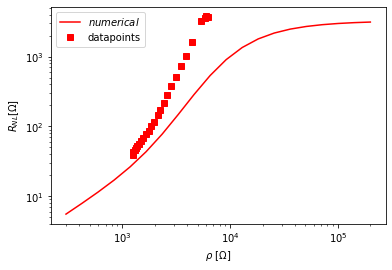

In [23]:
#@title Confronting with the theory {vertical-output:true}

width = 1.7e-6              #@param {type:"number"}
lv = 1.6e-6                 #@param {type:"number"}
x=2.3e-6                    #@param {type:"number"}
#@markdown ---
#@markdown `data_file`is a dropdown menu where you can choose the datapoints from the file
data_file = 2 #@param ["0", "1", "2"] {type:"raw"}
#@markdown `hall_cond` is an integer and with it you can change the theoretical prediction of $R_{NL}$ 
hall_cond = 4#@param {type:"integer"}

hall_conductivity=hall_cond*e**2/(2*np.pi*hbar)
rhoxx=np.logspace(np.log10(3e2),np.log10(2e5),20)
tan=rhoxx*hall_conductivity

colors=['blue','black','red']

plt.plot(rhoxx,R_NLx(x,width,lv,tan,limit=4e13)*rhoxx*width,label='$numerical$',color=colors[data_file])
#plt.plot(rhoxx,R_NL0(x,width,lv,tan)*rhoxx,label='$approx$',linestyle=(0,(1,3)),linewidth=3,color=colors[data_file])

#this part is for the data
data=np.loadtxt(files[data_file])
resistance=data[:,1]
rho=data[:,2]
shapes=['^','o','s']
plt.plot(rho,resistance,shapes[data_file],color=colors[data_file],label='datapoints')
    
plt.xscale('log')
plt.yscale('log')
plt.legend()
#plt.title(f'Hall conductivity = {hall_cond}$\, e^2/h$')
plt.xlabel('$\\rho$ [$\Omega$]')
plt.ylabel('$R_{NL}$[$\Omega$]')

plt.savefig(f'Latex/Immagini/rnl/rebecca_{data_file}.pdf',format='pdf')